# Coursework: Building a Regression Model

# Data Analysis of Diabetes Research

## Introduction

Diabetes is a chronic condition that occurs when the pancreas does not produce enough insulin or when the body is unable to use the insulin produced effectively. Insulin is a hormone that regulates blood sugar. Hyperglycaemia or elevated blood sugar is a common consequence of uncontrolled diabetes and over time can cause serious damage to many of the body's systems,especially the nerves and blood vessels. The number of people with diabetes rose from 108 million in 1980 to 422 million in 2014. Prevalence rates are rising faster in low- and middle-income countries than in high-income countries. Many factors could cause this disease such as glucose level, insulin level, number of times pregnant, etc. Many researchers have used the power of data analysis and machine learning models on diabetes to further investigate and infer the population and important factors influencing the onset of this condition so that it can be prevented.

The purpose of this project is to use appropriate machine learning models based on data analysis to investigate the factors that influence diabetes and to make appropriate predictions

## Objectives

Base on this project, I would like to explore:
   
   1.What age group is more susceptible to diabetes？  
       --- Analysis of trend
   
   2.What are the factors could cause diabetes?  
       --- Determine the primary and secondary factors.
   
   3.Find out the how this factors are related to diabetes
   
By analysing and solving problems based on this dataset, we will know the two main factors that affect diabetes and the people who are likely to be at risk, so that we can understand what measures to take to prevent this disease

## Aims

1. Determine how much data is needed to adequately investigate the aforementioned concerns, taking into account time and resource restrictions.  
2. Remove any redundant or null data to make it suitable for data cleaning and analysis.  
3.Clean up and modify the data so that it can be used in the approaches I want to utilize later.  
4.Identify trends in the data that allow for additional study by performing some exploratory data analysis.

## Data

This dataset is from the Kaggle official website posted by user 'MEHMET AKTURK, originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, This dataset comprises the aforementioned potential risk factors for diabetes and cross-sectional data on 2000 individual females of Pima Indian heritage who are at least 21 years old, with and without diabetes. Using this information, I will be able to investigate a number of potential causes of diabetes and assess their accuracy as predictors. It contains 768 unique instances (information from each patients) with 9 attributes and all the data are numeric-valued.

Here is the link of this dataset:  https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

#### For Each Attribute: 
- Pregnancies : Number of times pregnant,  
Datatype: int     


- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test,  
Datatype: int


- BloodPressure : Diastolic blood pressure (mm Hg),  
Datatype: int   


- SkinThickness : Triceps skin fold thickness (mm),  
Datatype: int  


- Insulin : 2-Hour serum insulin (mu U/ml),  
Datatype: int  


- BMI : Body mass index (weight in kg/(height in m)^2),  
Datatype: float 


- DiabetesPedigreeFunction : Diabetes pedigree function,  
Datatype: float     


- Age : Age (years),  
Datatype: int   


- Outcome : Class variable (0 or 1), 0 means NO and 1 means YES.  
Datatype: int        

Since the data was keeping in CSV file, this project converts CSV-formatted raw data into data analysis. This dataset includes a small-scale observation to help the prediction model's output fit.There is a small scale observation in this dataset to fit the prediction model, but I performed a basic exploratory data analysis to obtain a more comprehensive approach. In this research, it will be revealed which factors have a stronger influence on the diagnoses of diabetes. To make the study easier to follow, graphs and some other visualizations were included throughout. Simple to understand information.

## Implementation

- Pandas: for reading our dataset
- NumPy: for working with arrays and performing linear algebra
calculations 
- Seaborn: for visualizations
- Matplotlib: for visualization

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Import data

In [46]:
df = pd.read_csv('diabetes.csv')
df #show the data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
df.shape # show the data size, 768 instances and 9 columns

(768, 9)

In [48]:
df.info() # show the data information so that we can know the dataset better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Pre-processing

Since the dataset was converted and saved in CSV file, the raw data could be disorganized and complicated. Therefore,before beginning any sort of data analysis, data preprocessing is essential since it converts the raw data into an effective, standard, and intelligible format.Analyzing noisy data will not produce reliable results since it is unable to recognize patterns. Missing and duplicate data might cause the analysis to produce inaccurate results. The trend may be erroneous when there are outliers. The outcomes of the analysis and forecast would be impacted by this. So I would like to do these steps:

1. Data Cleaning
  - Finds and removes mistakes, duplicates, and unnecessary data from a raw dataset. This makes it possible to produce credible visualizations, models, and business choices using precise, logical data.
  
2. Data Reduction
  - To boost storage performance and efficiency while lowering storage expenses.
  
3. Data Transformation
  - Modify the data's structure, format, and values. Data that has been correctly prepared and verified is of higher quality and safeguards programs against potential pitfalls including null values, unexpected duplicates, erroneous indexing, and incompatible formats.
  
4. Data Integration
  - Combines data from different sources into a single, cohesive file. Data analysis is made more efficient as a result.

### Check null values

In [49]:
df.isnull().sum()  # Counting the presence of null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Result shows this dataset does not include any null value

### check duplicated values

In [50]:
df.duplicated().any() # Check if any duplicated value existed

False

Result shows this dataset does not include any duplicated value

### Check Data Types and Outliers

In [51]:
df.describe() #show the data details

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270  0.692891  0.204013   
1       0.844885  1.123396       0.160546       0.530902  0.692891  0.684422   
2       1.233880  1.943724       0.263941       1.288212  0.692891  1.103255   
3       0.844885  0.998208       0.160546       0.154533  0.123302  0.494043   
4       1.141852  0.504055       1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.622642       0.356432       1.722735  0.870031  0.115169   
764     0.547919  0.034598       0.046245       0.405445  0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594  0.735190   
766     0.844885  0.159787       0.470732       1.288212  0.692891  0.240205   
767     0.844885  0.873019       0.046245       0.656358  0.692891  0.202129   

     DiabetesPedigreeFunction       Age

As there may be values in the data that are too far off or not accurate enough, we need to eliminate them to avoid affecting the analysis results.

A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean.

Here I will use Z-score to determine whether the instance is an outlier. I set an arbitrary thershold of 2, beyond or exceed this range will be marked as outliers.

In [53]:
threshold = 2
print(np.where(z>threshold))

(array([  4,   7,   8,   8,   9,  12,  12,  13,  13,  13,  15,  18,  22,
        24,  28,  28,  30,  36,  39,  43,  45,  49,  49,  53,  54,  56,
        57,  58,  60,  60,  62,  72,  75,  78,  81,  81,  84,  84,  86,
        86,  88,  93,  99, 100, 106, 111, 115, 120, 120, 123, 125, 125,
       129, 139, 145, 147, 148, 152, 153, 154, 154, 155, 159, 172, 177,
       177, 182, 185, 186, 186, 187, 193, 193, 193, 199, 206, 206, 211,
       212, 215, 218, 220, 221, 222, 223, 228, 228, 228, 231, 243, 245,
       247, 247, 248, 254, 258, 258, 259, 259, 260, 261, 263, 266, 269,
       270, 274, 278, 286, 292, 294, 296, 298, 299, 300, 303, 308, 319,
       319, 323, 330, 332, 333, 335, 336, 342, 344, 347, 349, 357, 357,
       358, 359, 360, 360, 361, 362, 362, 363, 370, 370, 371, 371, 375,
       375, 375, 378, 383, 388, 392, 395, 399, 408, 408, 409, 415, 426,
       426, 430, 434, 435, 436, 440, 445, 445, 445, 453, 453, 455, 456,
       459, 468, 475, 479, 480, 484, 486, 487, 487, 489, 489, 4

In [54]:
clear_df = df[(z<2).all(axis=1)] #Exclude data that are out of range
clear_df.shape

(551, 9)

After clearence, the data size is reduced to 551.This is better for the analysis without outliers included.

In [55]:
clear_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,3.366606,115.627949,71.245009,20.627949,64.597096,31.675136,0.417218,30.517241,0.279492
std,2.824550,26.058701,11.236946,14.902027,75.009339,6.166533,0.235374,8.989245,0.449157
min,0.000000,57.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,0.000000,0.000000,27.150000,0.238000,23.000000,0.000000
50%,3.000000,112.000000,70.000000,23.000000,45.000000,31.900000,0.351000,28.000000,0.000000
75%,5.000000,129.500000,78.000000,32.000000,115.000000,35.700000,0.564500,37.000000,1.000000
max,10.000000,184.000000,106.000000,52.000000,310.000000,46.700000,1.127000,56.000000,1.000000


Now, let's draw a picture to get a better idea of the proportion of people with the disease

<AxesSubplot:ylabel='Outcome'>

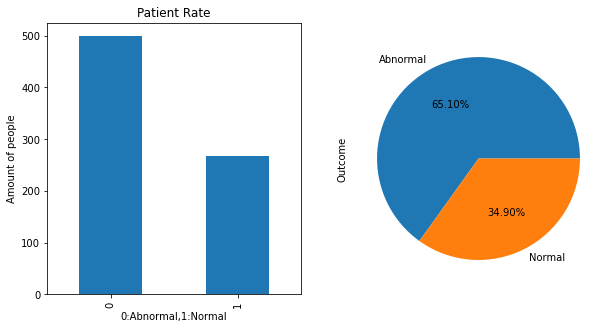

In [56]:
# Get the total number of patients
clear_df = df
patient_num = df['Outcome'].value_counts()

# Size of plot
fig,axes = plt.subplots(1,2,figsize=(10,5))
# Bar graph
ax = patient_num.plot(kind='bar',ax=axes[0])
ax.set_title('Patient Rate')
ax.set_xlabel('0:Abnormal,1:Normal')
ax.set_ylabel('Amount of people')
# Piechart
patient_num.plot(kind='pie',autopct='%.2f%%',labels=['Abnormal','Normal'])

D:\Code-APP\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Code-APP\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Code-APP\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

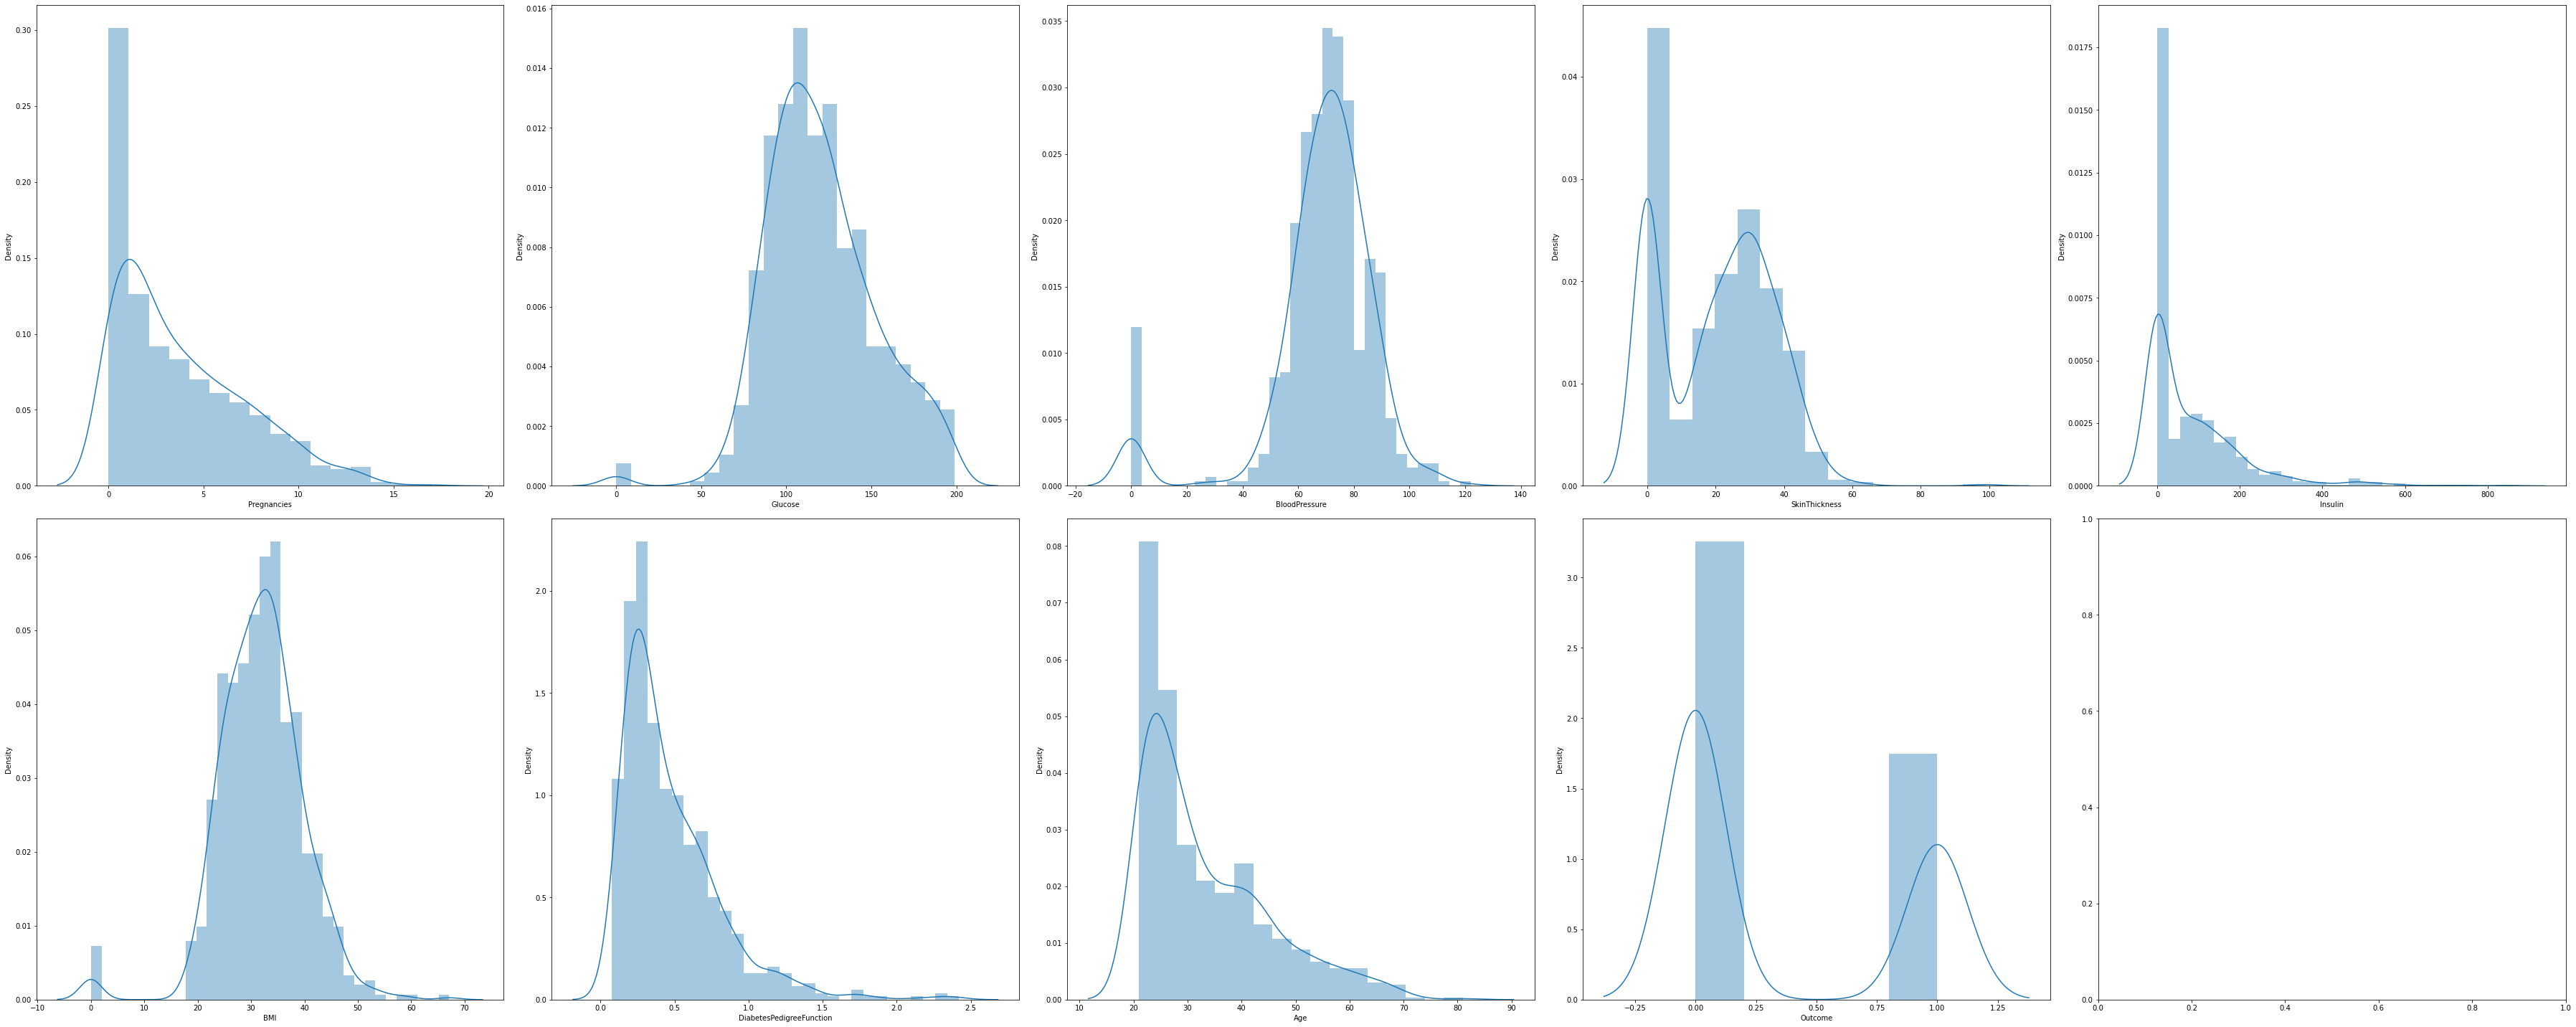

In [57]:
# Distribution of attributes
fig,axes = plt.subplots(2,5,figsize=(50,20))
for x in range(9):
    plt.subplot(2,5,x+1)
    sns.distplot(df.iloc[:,x],kde=True)
plt.tight_layout()

plot of :  Pregnancies


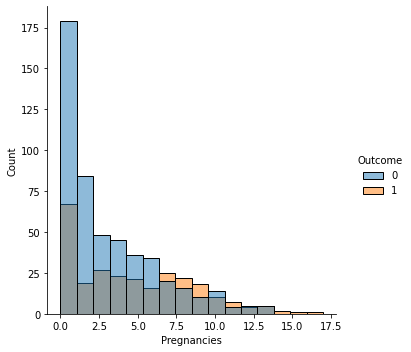

plot of :  Glucose


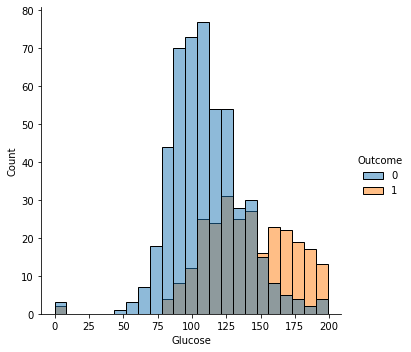

plot of :  BloodPressure


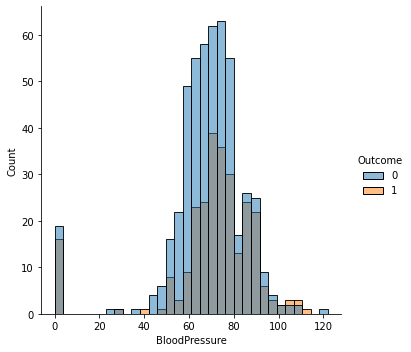

plot of :  SkinThickness


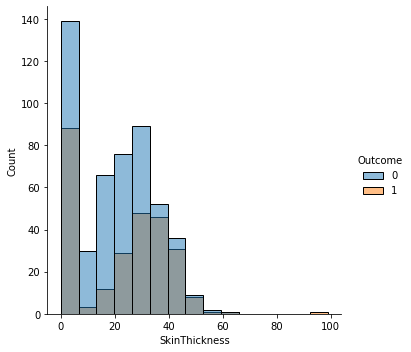

plot of :  Insulin


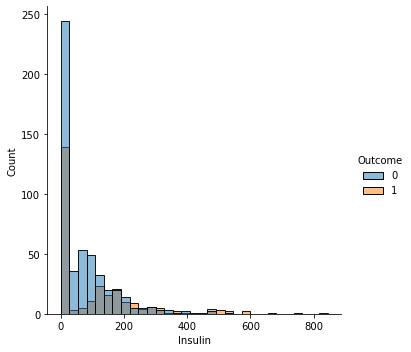

plot of :  BMI


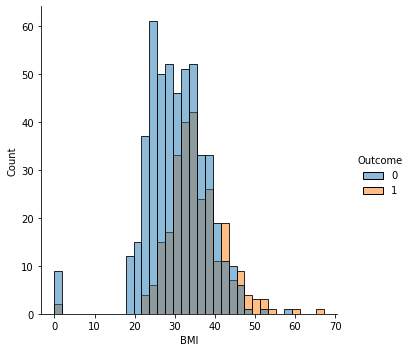

plot of :  DiabetesPedigreeFunction


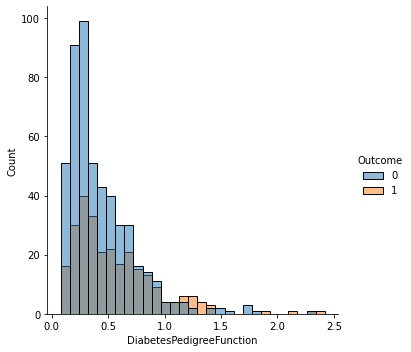

plot of :  Age


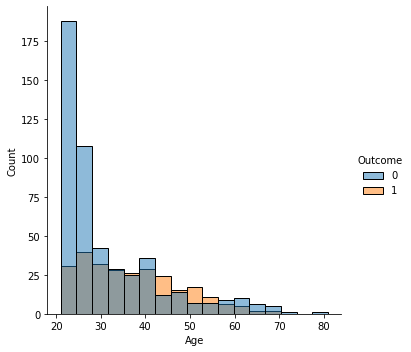

plot of :  Outcome


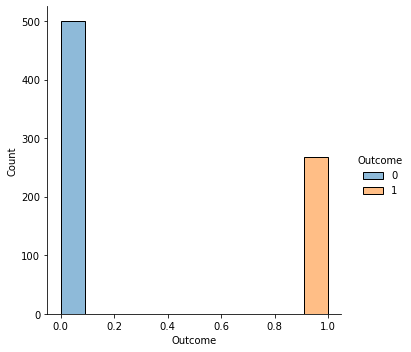

In [58]:
# let us check the correlation of outcomes with univariate graph by sns 

for columns in df.columns:
    print("plot of : ", columns)
    sns.displot(df, x=columns , kind='hist' , hue='Outcome')
    plt.show()

### Type Of Distribution
According to the graph, we can see that among these attributes.'pregencies','DiabetesPedigreeFunction','Age' and 'Insulin' are positively skewed distribution.'BloodPressure' and 'BMI' are nearly a normal distribution.

Next we use correlation matrix to analysis the relation between factors and outcomes

## Correlations Matrix

<AxesSubplot:title={'center':'Correlation Graph'}>

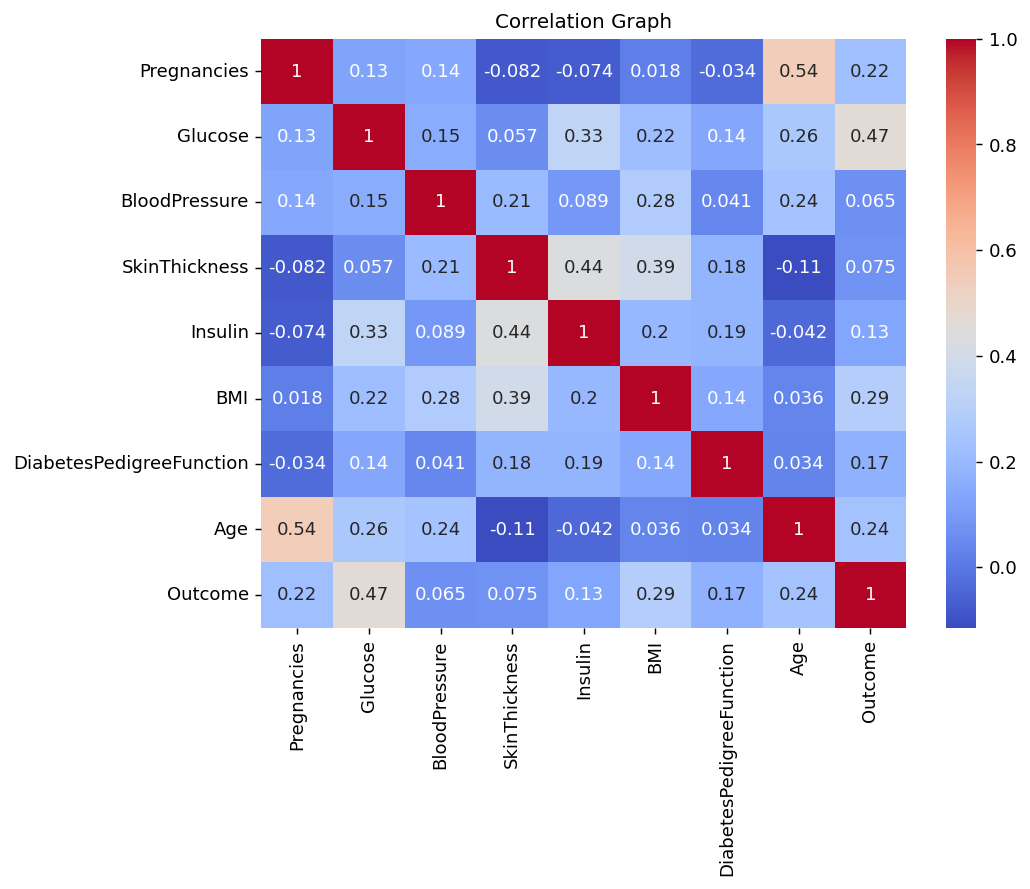

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi = 130)
plt.title('Correlation Graph', fontsize =11)
sns.heatmap(df.corr(),annot=True, cmap = "coolwarm")

The heatmap shows the relation between factors and the outcomes, If the coefficient is nearly to 1, the variable is more likely to related with the outcome,which means get diabetes. The variables are positively correlated if the coefficient is closer to 1, otherwise , it  will be called negatively correlated if closer to -1. According to the map, The higher glucose value, the higher possibility to get diabetes. So we know glucose is closely related to diabetes,with a correlation coefficient of 0.47. Besides, BloodPressure and SkinThickness is unlikely to related with the outcome with coefficient 0.065 and 0.075

## which age group is more likely to suffer from daibetes?

To answer this question, we need to see how does the age related to the outcome first.

<AxesSubplot:>

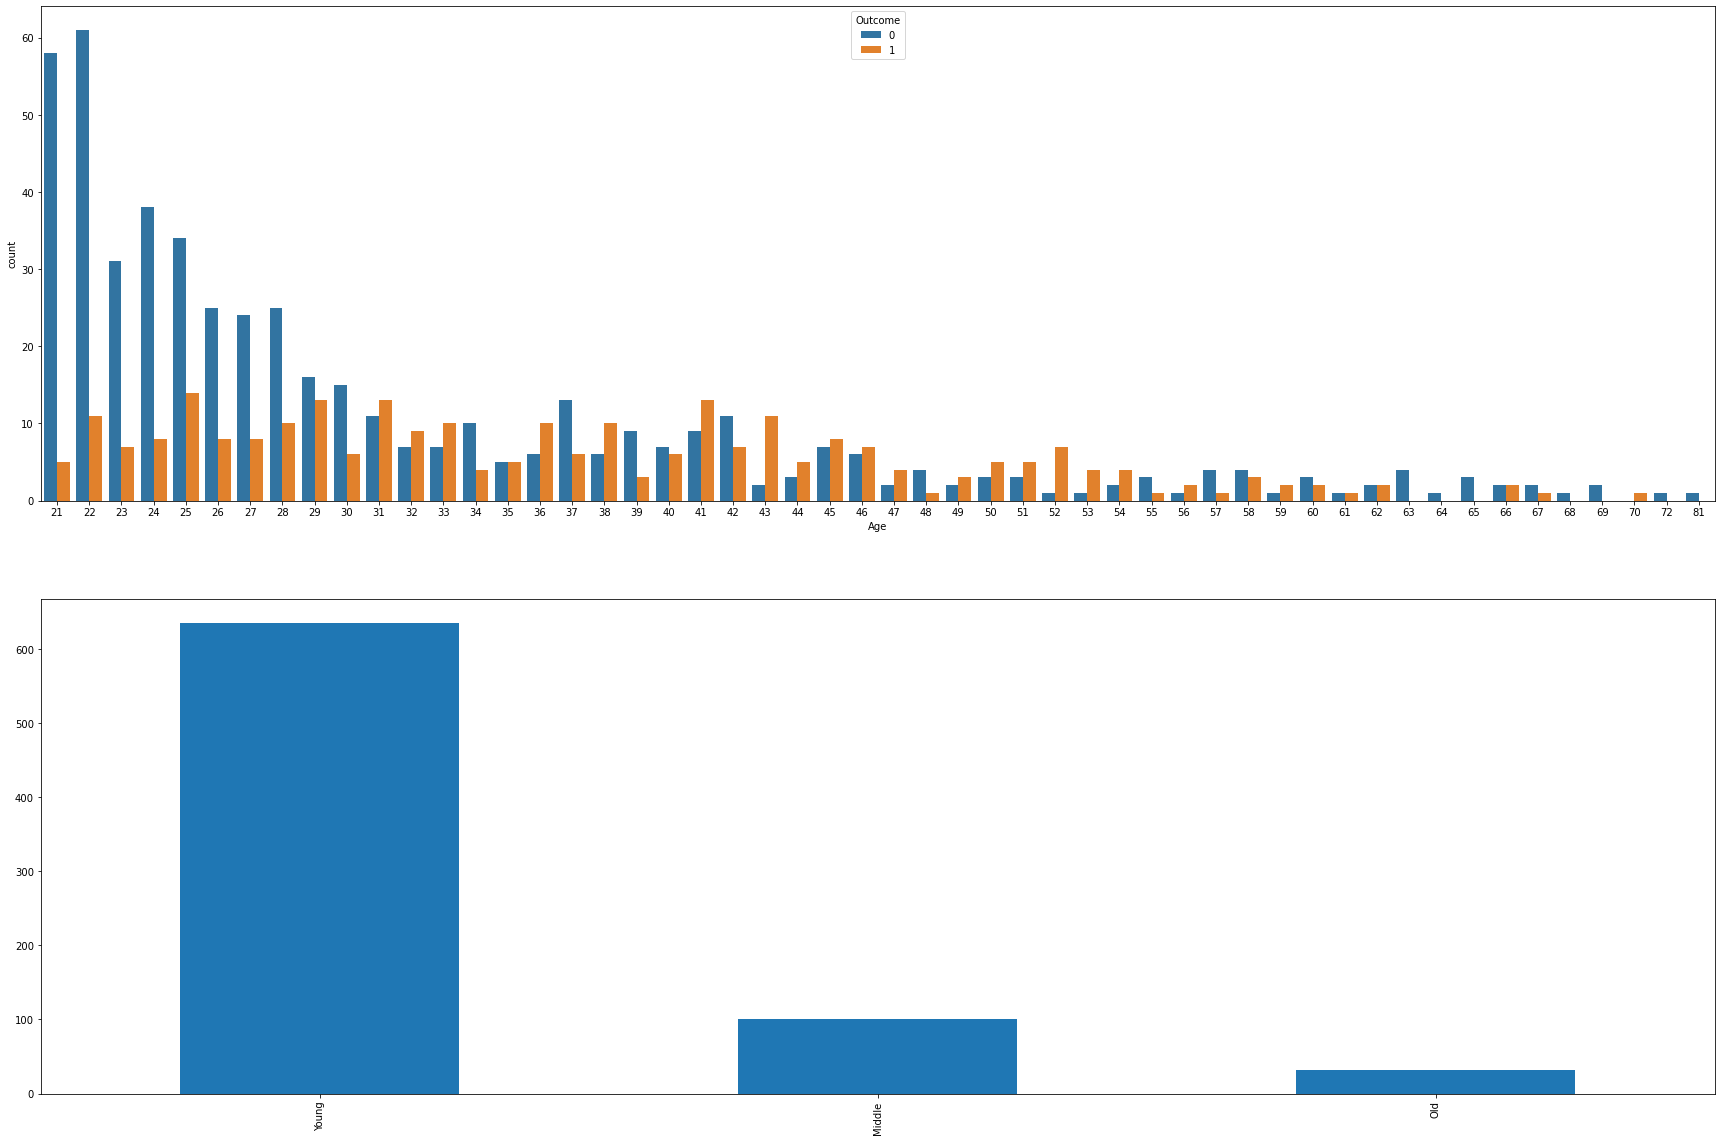

In [60]:
# size of the figure
fig,axes = plt.subplots(2,1,figsize=(30,20))
# Bargraph of the people with disease and no disease
sns.countplot(x='Age',hue='Outcome',data=df,ax=axes[0])
# cut the age into three age group
age_group = pd.cut(df.Age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['Young','Middle','Old'])
# Number of people in each age group
age_group.value_counts().plot(kind='bar')

From the first graph, we can see the number of sick and non-sick people per age compared to the number of sick people, and from the second graph we can see roughly how many people there are in each group. Here I have categorised the group aged 21-45 as young, 46-60 as middle-aged and 61-100 as elderly

Text(0.5, 1.0, 'Normal VS Age')

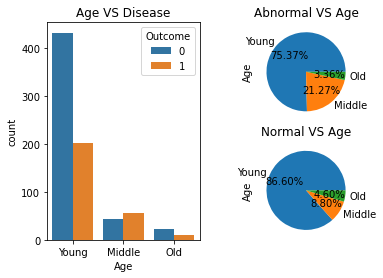

In [61]:
# Specify horizontal splicing, axis=1
target = pd.concat([age_group,df['Outcome']],axis=1)
# Bargraph of the people with disease and no disease
plt.figure()
ax4 = plt.subplot(121)
sns.countplot(x='Age',hue='Outcome',data=target,ax=ax4)
ax4.set_title('Age VS Disease')
# the ratio of age group with disease
ax5 = plt.subplot(222)
# Count the no of people with disease
target[target.Outcome==1].Age.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['Young','Middle','Old'])
ax5.set_title('Abnormal VS Age')
# the ratio of age group with no disease
ax6 = plt.subplot(224)
target[target.Outcome==0].Age.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['Young','Middle','Old'])
ax6.set_title('Normal VS Age')

Combining the two graphs we can recognise that the youngest group has the highest number of sufferers, but the middle-aged group has more sufferers than non-sufferers.The prevalence rate is highest in the middle-aged group

## The effect of level of glucose to the disease

A blood glucose test measures the amount of glucose (sugar) in a person’s blood and detects diabetes. While fasting, the normal blood glucose ranges from 70 to 99 mg/dL (3.9 to 5.5 mmol/L).So we split the population into two groups: Abnormal and Normal level of glucose. Then we find the relationship between glucose and diabetes.

In [62]:
glucose = df['Glucose'] # get the column of glucose data
gluc = np.array(glucose.values.T, dtype = 'int') # convert to array
print('level of glucose',gluc)

level of glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 115 126  99 196 119 143 125 147  97 145 117 109 158  88  92 122 103
 138 102  90 111 180 133 106 171 159 180 146  71 103 105 103 101  88 176
 150  73 187 100 146 105  84 133  44 141 114  99 109 109  95 146 100 139
 126 129  79   0  62  95 131 112 113  74  83 101 137 110 106 100 136 107
  80 123  81 134 142 144  92  71  93 122 163 151 125  81  85 126  96 144
  83  95 171 155  89  76 160 146 124  78  97  99 162 111 107 132 113  88
 120 118 117 105 173 122 170  84  96 125 100  93 129 105 128 106 108 108
 154 102  57 106 147  90 136 114 156 153 188 152  99 109  88 163 151 102
 114 100 131 104 148 120 110 111 102 134  87  79  75 179  85 129 143 130
  87 119   0  73 141 194 181 128 109 139 111 123 159 135  85 158 105 107
 109 148 113 138 108  99 103 111 196 162  96 184  81 147 179 140 112 151
 109 125  85 112 177 158 119 142 100  87 101 162 197 117 142 134  79 122
  74 171 181 179 164 104  91  91 1

In [63]:
gp1 = df.loc[df['Glucose']>99]
gp1 = gp1.iloc[:,7]
gp2 = df.loc[df['Glucose']<99]
gp2 = gp2.iloc[:,7]
gp1_25 = np.percentile(gp1.values, 25, interpolation='linear')
gp1_75 = np.percentile(gp1.values, 75, interpolation='linear')
print('Abnormal level of glucose of age group：',gp1_25 , '~', gp1_75 )
gp2_25 = np.percentile(gp2.values, 25, interpolation='linear')
gp2_75 = np.percentile(gp2.values, 75, interpolation='linear')
print('Normal level of glucose of age group：', gp2_25 , '~', gp2_75 )

Abnormal level of glucose of age group： 25.0 ~ 42.0
Normal level of glucose of age group： 22.0 ~ 34.25


In [64]:
# Find the range and the percentile
tarGluc = df.loc[df['Outcome'] == 1]['Glucose']
Range = max(tarGluc) - min(tarGluc) # Find the range
print("max:{},min:{}".format(max(tarGluc), min(tarGluc)))
percentile = np.percentile(tarGluc, 75, interpolation='linear') - np.percentile(tarGluc, 25, interpolation='linear')
print("Range", Range)
print("Percentile", percentile)


max:199,min:0
Range 199
Percentile 48.0


count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64


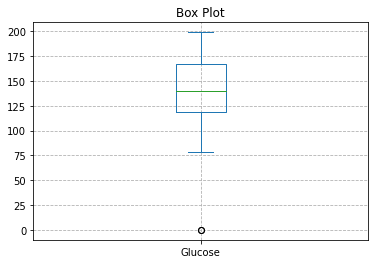

In [65]:
# Box plot
print(tarGluc.describe())
tarGluc.plot.box(title="Box Plot")
plt.grid(linestyle="--")
plt.show()

Skewness is a measure of symmetry, or more accurately, the absence of symmetry. If a distribution or data set appears the same to the left and right of the center point, it is said to be symmetrical.

Kurtosis is a metric that indicates how heavy-tailed or light-tailed the data are in comparison to a normal distribution. In other words, data sets with a high kurtosis tend to have large outliers or heavy tails. Data sets with low kurtosis frequently lack outliers and have light tails.

In [66]:
# Transform into series
s = pd.Series(tarGluc)
print('Skewness:', s.skew()) # Use pd find skewness
print('Kurtosis:', s.kurt()) # Use pd find kurtosis

Skewness: -0.49555709300308276
Kurtosis: 1.431960011975912


Since the skewness is between -0.5 and 0.5, the data are fairly symmetrical.Besides,the kurtosis is less than 3, therefore this distribution shows lower kurtosis than mesokurtic. In conclusion, the middle age people more likely to have a higher level of glucose, which leads to a higher possibility to get diabetes.

##  Find out if BMI also a key factor

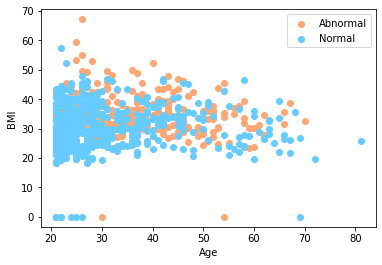

In [67]:
# Visualise the distribution of age and BMI
plt.scatter(x=df.Age[df.Outcome==1], y=df.BMI[df.Outcome==1], c="#FFA773")
plt.scatter(x=df.Age[df.Outcome==0], y=df.BMI[df.Outcome==0], c="#66CCFF")
plt.legend(["Abnormal",'Normal'])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

As we can see from the graph, those people whose BMI is within the range of 20-45 is more likely can avoid from diabetes, but the with the BMI value getting higher, more people likely to get this diease. In that case, we can conclude that BMI is also a key factor to diabetes.

## Find out relation between BloodPressure and disease

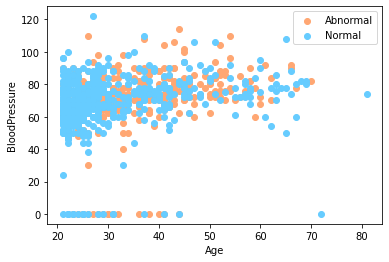

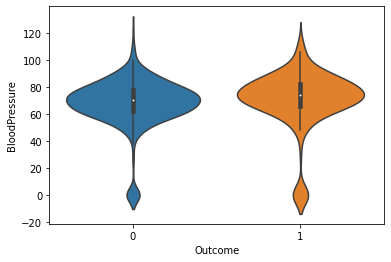

In [68]:
plt.scatter(x=df.Age[df.Outcome==1], y=df.BloodPressure[(df.Outcome==1)], c="#FFA773")
plt.scatter(x=df.Age[df.Outcome==0], y=df.BloodPressure[(df.Outcome==0)], c='#66CCFF')
plt.legend(["Abnormal", "Normal"])
plt.xlabel("Age")
plt.ylabel("BloodPressure")
plt.show()
sns.violinplot(x=df.Outcome,y=df.BloodPressure,data=df)
plt.show()

According to the graph, we can see that the level of patient and normal people are almost the same, which are normally within the range 60-100mmHg. Hence BloodPressure is not a strongly related factor to diabetes.

## Effect of Insulin and SkinThickness to dieases

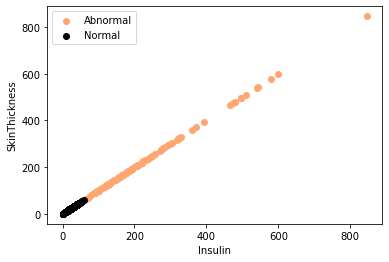

In [69]:
plt.scatter(x=df.Insulin[df.Outcome==1], y=df.Insulin[df.Outcome==1], c="#FFA773")
plt.scatter(x=df.SkinThickness[df.Outcome==0], y=df.SkinThickness[df.Outcome==0], c="black")
plt.legend(["Abnormal",'Normal'])
plt.xlabel("Insulin")
plt.ylabel("SkinThickness")
plt.show()

According to the graph, the distribution of normal people and patient are more like a linear relation. Higher level of Insulin may result to a thicker skin and may also lead to a higher risk of being diabetic.Besides, It also shows that the people have a lower level of Insulin will get a thinner skin and not likely to be diabetic.

## Predicting with Machine Leaning

Preparing the data is an important stage in machine learning. If we just input the raw data into a model, we would never be able to make an accurate prediction. So, in order to improve the performance of models, we need to analyze the raw data. To lessen the impact of various variable units and quantity levels on the analysis, categorical variables were processed via one-hot encoding after being standardized for continuous variables.
Standardization and scaling are required to manage numerical characteristics (columns) that have widely disparate value ranges.

In [70]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## By KNN

A non-parametric method for classification and regression is K-nearest neighbors. It is also one of the easiest ML approaches. Checking the neighbors, assuming that the test datapoints are comparable to them, and then evaluating the outcome is the core principle of KNN. In KNN, we look for k neighbors to discover the prediction.

The k nearest datapoints are selected by majority vote in KNN classification, whereas the mean of the k nearest datapoints is calculated as the output in KNN regression.

Advantages :

   - Easy and simple machine learning model.  
   - Several hyperparameters to adjust.
   
Disadvantages :

   - k should be wisely selected.  
   - If the sample size is huge, there will be a significant calculation cost during runtime.
   - For features to be treated fairly, appropriate scaling should be offered.

In [71]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [72]:
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [75]:
knn_params = {"n_neighbors": range(2, 50)}
knn_fit = GridSearchCV(knn,
                       knn_params,
                       cv=5,
                       n_jobs=-1,
                       verbose=1).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [76]:
knn_fit.best_params_

{'n_neighbors': 17}

In [77]:
knn_model = knn.set_params(**knn_fit.best_params_).fit(X, y)

In [78]:
results = cross_validate(knn_model,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [79]:
random_user = X.sample(1)
def knn_model(X,y):
    X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)
    knn=KNeighborsClassifier().fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print('Test Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
    print("Accuracy Score  : ", accuracy_score(y_test,y_pred))
    print("Cross Validate Score  : ",cross_val_score(knn,X_test,y_test,cv=10).mean())
    print("Classification Report:\n",classification_report(y_test,y_pred))

knn_model(X,y)


Test Confusion Matrix:
 [[119  32]
 [ 39  41]]
Accuracy Score  :  0.6926406926406926
Cross Validate Score  :  0.7016304347826087
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



In [80]:
knn.score(X,y)

0.76953125

## By Decision Tree

To solve classification and regression issues, a decision tree-based method is employed. An inverted tree is built to provide the output, branching from a root node with such a uniform probability distribution to leaf nodes with significant heterogeneity. Regression trees are used for regression model with continuous values, whereas classification methods are used for dependent variables with discrete values.

Advantage:
   - No data preparation is required.
   - No data distribution assumptions are used.
   - Colinearity is well handled
   - Decision trees can offer a comprehensible justification for the forecast.
    

Disadvantage:  
   - If we continue to grow the tree to obtain high purity, there is a risk of overfitting the model. This problem can be resolved by using pruning of the decision tree.  
   - Prone to outliers  
   - In the course of training complex datasets, a tree may become exceedingly complex.  
   - Loses important data while working with continuous variables.  

In [81]:
X=df.drop(["Outcome"],axis=1)
y=df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### model

In [82]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, test_size=0.25)
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(X_train,y_train)
dtree.score(X_train,y_train)

0.7690972222222222

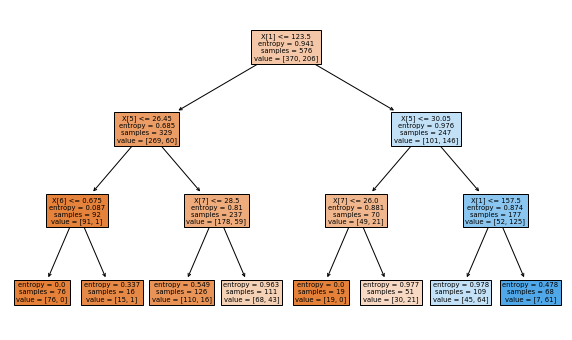

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(dtree, filled=True)
plt.show()

In [84]:
# Prediction
dtree.predict((X_test))

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# Compute accuracy
dtree.score(X_test,y_test)

0.7447916666666666

## By Random Forest

A group of decision trees called Random Forest is used, and the average or majority vote of the forest is used to determine the anticipated result. Compared to Decision Tree, the Random Forest model will be less prone to overfitting and provide a more generic answer. Decision trees are less reliable and accurate than Random Forest. KNN and decision trees are non-parametric techniques. KNN does not provide automated feature interaction, although decision trees do. Because KNN requires expensive real-time execution, decision trees are quicker.

Advantages: 
   - less prone to overfitting than Decision Tree and other algorithms    
   - Outputs the importance of features which is very useful
   
Disadvantages:
   - May change considerably by a small challenge in the data
   - Computations go far more complex than other algorithms

In [86]:
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [87]:
# Prediction
dtree.predict((X_test))

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [88]:
# Compute accuracy
rfc.score(X_test, y_test)

0.7395833333333334

## Summary and Conclusion

Within this project, now we have a deeper knowledge on diabetes. Some characteristics may have an effect on cardiac disorders, as shown in the findings section of the exploratory data analysis. Additionally, the data contain correlations and patterns that make this dataset suitable for future investigation. However as mentioned before, this dataset was modified by author and a lot of data could be different from the original one, which may lead the conclusion of analysis is not fully applicable in real life. To get a better conclusion, we should get a larger size of data with more variables and instances.

According to the analysis, we can answer the question set before:

   1.What age group is more susceptible to diabetes？  
       --- Due to the larger base, there are more young people（21-45 years old) with the disease, but proportionally the middle-aged(45-60 years old) population has a higher percentage of the disease, which also means that middle age is more susceptible to the disease
   
   2.What are the factors could cause diabetes?  
       --- The Primary factor is the level of Glucose and the Secondary factor is the perosonal BMI status.
   
   3.Find out the how these factors are related to diabetes   
       --- Some factors are strongly related to disease,such as BMI, Age, Level of Glucose, etc. But other factors like BloodPressure, times of pregenacies are not relly be the factor can cause diabetes. 
       
Investigating sentiment analysis technologies would be helpful for the project in order to get analytical results that are more precise. Additionally, models that might provide a better comprehension of the data and make more accurate predictions are built using KNN, Decision Trees, and Random Forest Classifiers. Before building the models, there are a few stages to take, including data scaling, data splitting for training and testing, and data preprocessing. Then, we can assess which classifier is more effective at forecasting and making choices. I think the method we use on analysing this dataset is also applicable to other domain-specific areas, especially on other diseases. 

But python maybe the best way we can use to process all these data compare to Javascirpt or other languages at this stage.

Since KNN Model got score 0.76953125, Decision Tree Model got score 0.7447916666666666, Random Forest Model got score 0.7395833333333334, It is clear that KNN model is the best to utilize to do further research on this dataset. But this method could take longer time to process the data if its size is too large.

Besides, the future purpose of utilizing this dataset may need to use Logistic Regression so that it could be more suitable to do prediction, with the use of Logistic Regression we may also be able to predict whether a people can be diabetic with his/her certain data. The model could be more useful in real life.

In conclusion, To avoid the development of diabetes, people should adopt a low salt, low fat, and low sugar diet, exercise regularly, consume more vegetables to manage blood sugar, and always take care of their health.

## References and Resources

- Z-Score: Definition, Calculation and Interpretation[Accessed 20 December 2022]   
Available at ：   
https://www.simplypsychology.org/z-score.html
- Diabetes-with-different-SKlearn_Method[Accessed 20 December 2022]   
Available at :   https://www.kaggle.com/code/lucaschanlucas/diabetes-with-different-sklearn-method
- What is the k-nearest neighbors algorithm? [online] [Accessed 20 December 2022]   
Available at : 
https://www.ibm.com/topics/knn

- Calculate and Plot a Correlation Matrix in Python and Pandas [online] [Accessed 20 December 2022]   
Available at :
https://datagy.io/python-correlation-matrix/
- Machine Learning - Decision Tree [online] [Accessed 21 December 2022]   
Available at :
https://www.w3schools.com/python/python_ml_decision_tree.asp
- What is Data Processing? by Afshan Banu [online] [Accessed 21 December 2022]   
Available at :
https://www.educba.com/what-is-data-processing/
- WHAT ARE NORMAL GLUCOSE LEVELS? [online] [Accessed 25 December 2022]   
Available at :
https://sugarmds.com/normal-glucose-levels-blood/
- How to Calculate Skewness and Kurtosis in Python?[online] [Accessed 26 December 2022]   
Available at :
https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/
- Data Analysis with Python[online] [Accessed 26 December 2022]   
Available at :
https://www.youtube.com/watch?v=r-uOLxNrNk8